In [1]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
# import OS module
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
path = "http://localhost:8888/tree/Documents/GitHub/Gas_Sensor_Calibration/Mobile data"

obj = os.scandir()
 
# List all files and directories in the specified path
print("Files and Directories in '% s':" % path)
for entry in obj:
    if entry.is_dir() or entry.is_file():
        print(entry.name)

Files and Directories in 'http://localhost:8888/tree/Documents/GitHub/Gas_Sensor_Calibration/Mobile data':
GPS_Aero&AQ50_3nov.csv
3nov_route.csv
Untitled.ipynb
AQ50_3nov.csv
AQ24_3nov.csv
Aero_AQ24_3nov.csv
20211103-150109.gpx
Aero_AQ50_3nov.csv
Aero_gases_3nov.csv
aeroqual_031121.csv
GPS_Aero&AQ24_3nov.csv
Gases_3nov.csv
GPS_Aero&gases_3nov.csv
.ipynb_checkpoints


In [19]:
a = pd.read_csv('Aero_AQ50_3nov.csv', parse_dates = ['created_at'])
b = pd.read_csv('Aero_AQ24_3nov.csv',  parse_dates = ['created_at'])
c = pd.read_csv('Aero_gases_3nov.csv',  parse_dates = ['created_at'])

In [4]:
print(list(a), len(a))
print(list(b), len(b))
print(list(c), len(c))

['created_at', ' Monitor ID', ' Location ID', ' CO(ppm)', ' PM10(ppm)', ' PM2.5(ppm)', ' SO2(ppm)', 'pm10', 'pm2.5', 'RH', 'Temperature'] 362
['created_at', ' Monitor ID', ' Location ID', ' CO(ppm)', ' PM10(ppm)', ' PM2.5(ppm)', ' SO2(ppm)', 'pm10', 'pm2.5', 'RH', 'Temperature'] 359
['created_at', ' Monitor ID', ' Location ID', ' CO(ppm)', ' PM10(ppm)', ' PM2.5(ppm)', ' SO2(ppm)', 'CO_1', 'SO2_1', 'CO_2', 'SO2_2', 'Temperature', 'RH', 'Pressure'] 321


In [20]:
a[' PM10(ppm)'] = pd.to_numeric(a[' PM10(ppm)'], errors='coerce')
a[' PM2.5(ppm)'] = pd.to_numeric(a[' PM2.5(ppm)'], errors='coerce')
b[' PM10(ppm)'] = pd.to_numeric(b[' PM10(ppm)'], errors='coerce')
b[' PM2.5(ppm)'] = pd.to_numeric(b[' PM2.5(ppm)'], errors='coerce')
c[' CO(ppm)'] = pd.to_numeric(c[' CO(ppm)'], errors='coerce')
c[' SO2(ppm)'] = pd.to_numeric(c[' SO2(ppm)'], errors = 'coerce')

In [21]:
a = a.dropna(subset=[' PM10(ppm)', ' PM2.5(ppm)'])
b = b.dropna(subset=[' PM10(ppm)', ' PM2.5(ppm)'])
s = c.dropna(subset=[' SO2(ppm)'])
c = c.dropna(subset=[' CO(ppm)'])


print(len(a))
print(len(b))
print(len(c))
print(len(s))

168
168
81
60


In [14]:

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.01)

fig.add_trace(go.Scatter(x=a['created_at'], y=a[' PM10(ppm)']*1000, name = 'Aeroqual PM10', xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=a['created_at'], y=a['pm10'], name = 'AQ50 PM10',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)


fig.add_trace(go.Scatter(x=a['created_at'], y=a[' PM2.5(ppm)']*1000, name = 'Aeroqual PM2.5',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=a['created_at'], y=a['pm2.5'], name = 'AQ50 PM2.5',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)



fig.update_layout(height=600, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis2=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="PM2.5"),
    yaxis2=dict(title="PM10"),
   
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()

In [15]:

fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.01)

fig.add_trace(go.Scatter(x=b['created_at'], y=b[' PM10(ppm)']*1000, name = 'Aeroqual PM10', xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=b['created_at'], y=b['pm10'], name = 'AQ24 PM10',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)


fig.add_trace(go.Scatter(x=b['created_at'], y=b[' PM2.5(ppm)']*1000, name = 'Aeroqual PM2.5',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=b['created_at'], y=b['pm2.5'], name = 'AQ24 PM2.5',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)



fig.update_layout(height=600, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis2=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="PM2.5"),
    yaxis2=dict(title="PM10"),
   
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()

In [22]:

fig = make_subplots(rows=4, cols=1,
                    shared_xaxes=False,
                    vertical_spacing=0.1)

fig.add_trace(go.Scatter(x=c['created_at'], y=c['CO_1'], name = 'Gas node CO-1', xaxis="x4",yaxis = 'y4'),
              row=4, col=1)

fig.add_trace(go.Scatter(x=c['created_at'], y=c[' CO(ppm)'], name = 'Aeroqual CO',  xaxis="x4",yaxis = 'y4'),
              row=4, col=1)


fig.add_trace(go.Scatter(x=c['created_at'], y=c['CO_2'], name = 'Gas node CO-2',  xaxis="x3",yaxis = 'y3'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=c['created_at'], y=c[' CO(ppm)'], name = 'Aeroqual CO',  xaxis="x3",yaxis = 'y3'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=s['created_at'], y = s['SO2_1'], name = 'Gas node SO2-1',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=s['created_at'], y = s[' SO2(ppm)'], name = 'Aeroqual SO2',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=s['created_at'], y = s['SO2_2'], name = 'Gas node SO2-2',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=s['created_at'], y = s[' SO2(ppm)'], name = 'Aeroqual SO2',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.update_layout(height=1000, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis4=dict(title ="Timestamp",domain=[0.8, 0.7]),
    xaxis3=dict(title ="Timestamp",domain=[0.8, 0.7]),
    xaxis2=dict(title ="Timestamp",domain=[0.8, 0.7]),
    xaxis=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="SO2"),
    yaxis2=dict(title="SO2"),
    yaxis3=dict(title="CO"),
    yaxis4=dict(title="CO"),
   
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()

# Megasense

## Device 76

In [23]:
d1 = pd.read_csv('Aero_device76_3nov.csv', parse_dates = ['Date Time'])
d1[' PM10(ppm)'] = pd.to_numeric(d1[' PM10(ppm)'], errors='coerce')
d1[' PM2.5(ppm)'] = pd.to_numeric(d1[' PM2.5(ppm)'], errors='coerce')
d1[' CO(ppm)'] = pd.to_numeric(d1[' CO(ppm)'], errors='coerce')

In [24]:
fig = make_subplots(rows=5, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.01)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['temp_c'], name = 'Temperature', xaxis="x5",yaxis = 'y5'),
              row=5, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['hum_prcnt'], name = 'Humidity',  xaxis="x4",yaxis = 'y4'),
              row=4, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['co_ppm'], name = 'CO(ppm) Megasense',  xaxis="x3",yaxis = 'y3'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['ozone_ppm'], name = 'O3(ppm) Megasense',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['no2_ppb'], name = 'NO2(ppb) Megasense',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.update_layout(height=600, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis5=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="NO2"),
    yaxis2=dict(title="Ozone"),
    yaxis3=dict(title="CO"),
    yaxis4=dict(title="Humidity"),
    yaxis5=dict(title="Temperature"),
        
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()

31
max correlation is at lag 13
max correlation is  0.291
Pearsons correlation: -0.297
MSE CO:  123740.00748387097
MAE CO:  345.3290322580645
RMSE CO:  351.7669789560569


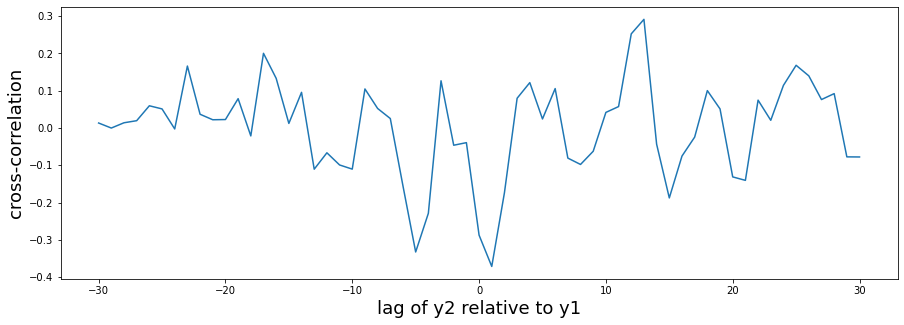

In [25]:
d11 = d1[d1[' CO(ppm)'].notna()]
print(len(d11))
d11 = d1[d1[' CO(ppm)'].notna()]
y1 = d11['co_ppm']
y2 = d11[' CO(ppm)']
npts = len(d11)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y2 - y2.mean(), y1 - y1.mean(), mode='full')
ccor = ccov / (npts * y2.std() * y1.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation', fontsize =18)
plt.xlabel('lag of y2 relative to y1', fontsize =18)

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y2, y1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y1, y2)
MAE = mean_absolute_error(y1, y2)
print("MSE CO: ", MSE)
print("MAE CO: ", MAE)
print("RMSE CO: ", np.sqrt(mean_squared_error(y1, y2)))

Text(0.5, 1.0, 'correlation of data')

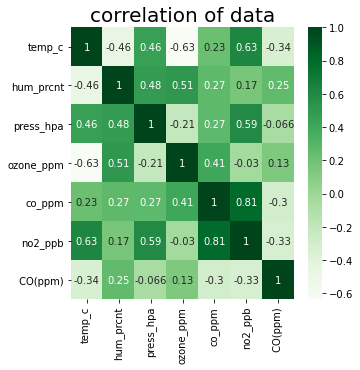

In [26]:
import seaborn as sns
mask = np.triu(np.ones_like(d11, dtype=bool))
plt.rcParams['figure.figsize'] = (5, 5)
hm = sns.heatmap(d11[['temp_c','hum_prcnt','press_hpa','ozone_ppm','co_ppm', 'no2_ppb',' CO(ppm)']].corr(), annot = True, cmap = 'Greens')
hm.set_title(label = "correlation of data", fontsize = 20)

## Device 61

In [4]:
d1 = pd.read_csv('Aero_device61_3nov.csv', parse_dates = ['Date Time'])
d1[' PM10(ppm)'] = pd.to_numeric(d1[' PM10(ppm)'], errors='coerce')
d1[' PM2.5(ppm)'] = pd.to_numeric(d1[' PM2.5(ppm)'], errors='coerce')
d1[' CO(ppm)'] = pd.to_numeric(d1[' CO(ppm)'], errors='coerce')

In [5]:

fig = make_subplots(rows=5, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.01)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['temp_c'], name = 'Temperature', xaxis="x5",yaxis = 'y5'),
              row=5, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['hum_prcnt'], name = 'Humidity',  xaxis="x4",yaxis = 'y4'),
              row=4, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['co_ppm'], name = 'CO(ppm) Megasense',  xaxis="x3",yaxis = 'y3'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['ozone_ppm'], name = 'O3(ppm) Megasense',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['no2_ppb'], name = 'NO2(ppb) Megasense',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.update_layout(height=600, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis5=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="NO2"),
    yaxis2=dict(title="Ozone"),
    yaxis3=dict(title="CO"),
    yaxis4=dict(title="Humidity"),
    yaxis5=dict(title="Temperature"),
        
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()

## Device C5

In [9]:
d1 = pd.read_csv('Aero_deviceC5_3nov.csv', parse_dates = ['Date Time'])
d1[' PM10(ppm)'] = pd.to_numeric(d1[' PM10(ppm)'], errors='coerce')
d1[' PM2.5(ppm)'] = pd.to_numeric(d1[' PM2.5(ppm)'], errors='coerce')
d1[' CO(ppm)'] = pd.to_numeric(d1[' CO(ppm)'], errors='coerce')

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=5, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.01)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['temp_c'], name = 'Temperature', xaxis="x5",yaxis = 'y5'),
              row=5, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['hum_prcnt'], name = 'Humidity',  xaxis="x4",yaxis = 'y4'),
              row=4, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['co_ppm'], name = 'CO(ppm) Megasense',  xaxis="x3",yaxis = 'y3'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['ozone_ppm'], name = 'O3(ppm) Megasense',  xaxis="x2",yaxis = 'y2'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=d1['Date Time'], y=d1['no2_ppb'], name = 'NO2(ppb) Megasense',  xaxis="x1",yaxis = 'y1'),
              row=1, col=1)

fig.update_layout(height=600, width=1000,
                  title_text="Stacked Subplots with Shared X-Axes")



# Create axis objects
fig.update_layout(
    xaxis5=dict(title ="Timestamp",domain=[0.8, 0.7]),
    yaxis=dict(title="NO2"),
    yaxis2=dict(title="Ozone"),
    yaxis3=dict(title="CO"),
    yaxis4=dict(title="Humidity"),
    yaxis5=dict(title="Temperature"),
        
   
)

# Update layout properties
fig.update_layout(
    title_text="multiple y-axes example",
    width=800,
)


fig.show()